# MODEL COMPATIMENTAL SEIR
https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SEIR_model

In [1]:
import pandas as pd
## Internal variables:
numdies = 181
sus= [0]*numdies ## Persones suceptibles
exp= [0]*numdies ## Persones exposades
inf= [0]*numdies ## Persones infectades
inf_mild= [0]*numdies ## Persones infectades lleus
inf_severes= [0]*numdies ## Persones infectades severes
inf_fatal= [0]*numdies ## Persones infectades amb resultat de mort
rec= [0]*numdies ## Persones que ja no estan infectats o que han mort
rec_mild= [0]*numdies ## Persones recuperades despres de una malaltia lleu
rec_severes= [0]*numdies ## Persones infectades  despres de una malaltia severa amb ingrès hospitaliari 
rec_fatal= [0]*numdies ## Exitus


index = range(numdies)


In [2]:
## DADES INICIALS DEL MODEL
dataInici='2020-02-15'
# Dades poblaciionals

N=450000 # Població de Lleida
num_inf_ini=100 # Número incial de persones infectades

# Dades epidemiológics
Tgamma=25 # Duracio de la infeccio (dies)
Talfa=5 # Periode mitja de incubacio (dies)
R0=3 # Nombre basic de reproduccio



# Dades Calculats
gamma=1/Tgamma
alfa=1/Talfa
beta=R0*gamma # Mitjana de contactes per persona i temps



In [3]:
sus[0]=N
inf[0]=num_inf_ini
for i in range(1,numdies):
    sus[i]=sus[i-1]-(beta*inf[i-1]*sus[i-1]/N)
    exp[i]=exp[i-1]+(beta*inf[i-1]*sus[i-1]/N)-(alfa*exp[i-1])
    inf[i]=inf[i-1]+(alfa*exp[i-1])-(gamma*inf[i-1])
    rec[i]=rec[i-1]+(gamma*inf[i-1])


In [4]:
dates = pd.date_range(start=dataInici, periods=numdies).tolist()
bbdd = pd.DataFrame({'Index':index,'Data':dates, 'Suscep':sus, 'Exposats':exp, 'Infectats':inf, 'Recuperats':rec})
bbdd

,Index,Data,Suscep,Exposats,Infectats,Recuperats
0,0,2020-02-15,450000.000000,0.000000,10.000000,0.000000
1,1,2020-02-16,449997.500000,2.500000,9.166667,0.833333
2,2,2020-02-17,449995.208346,3.958321,9.236111,1.597222
3,3,2020-02-18,449992.899343,4.947884,9.785875,2.366898
4,4,2020-02-19,449990.452913,5.745019,10.619680,3.182388
...,...,...,...,...,...,...
176,176,2020-08-09,25681.615873,186.428866,3472.411713,420669.543547
177,177,2020-08-10,25632.073016,173.828769,3245.187026,420958.911190
178,178,2020-08-11,25585.861421,162.097441,3032.697697,421229.343442
179,179,2020-08-12,25542.753541,151.172840,2834.005369,421482.068250


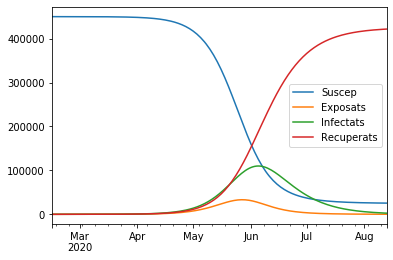

In [5]:
df = pd.DataFrame({'Suscep':sus, 'Exposats':exp, 'Infectats':inf, 'Recuperats':rec}, index=dates)
lines = df.plot.line()